***Preferencias en el Uso de Canales***

# ***Experimientos e iteraciones con los modelos iniciales***
Por Tatiana Molina - Carolina Alvarez

Una vez se realizó la limpieza de los datos la información resultante fue almacenada en un repositorio de Google Cloud para mejorar el rendimiento de la ejecucion de cada notebook para las siguientes ejecuciones.

# **1. Consultar la base de datos de contactos y clientes**

Realizamos una lectura de los datos del repositorio para consultas de la organización (Google Cloud), al tratarse de datos confidenciales no es posible ejecutar estas celdas desde fuentes externas.

En este caso realizamos la consulta de la información resultante de la limpeiza de datos, sin embargo esta consulta se organizó para incluir unicamente el canal de contacto mas frecuente para cada cliente, esto dado que se identificó en las hiteraciones anteriores que un cliente podia tener varias contacto a traves de diferentes canales y por tanto esto puedia estar afectando el desempeño del modelo.

Se omitan la conexión y query a la base de datos por contener información sensible

In [ ]:
from google.cloud import bigquery

In [ ]:
client = bigquery.Client(location="US")

In [ ]:
query = """
SELECT 

 """
query_job = client.query(query, location="US",) # API request - starts the query

In [ ]:
df = query_job.to_dataframe()

In [ ]:
#Cambiemos el tipo de datos de las variables para poder usar un codificación Label Encoder

df['descTema'] = df['descTema'].astype('str')
df['descCanalRadicacion'] = df['descCanalRadicacion'].astype('str')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].astype('str')
df['descCicloVida'] = df['descCicloVida'].astype('str')
df['descOcupacion'] = df['descOcupacion'].astype('str')
df['descRegional'] = df['descRegional'].astype('str')

# Recordemos información de la variable a predecir.

> Bloque con sangría


Es importante recordar que presenta un desbalance fuerte concentrado en 3 valores.

In [ ]:
df['descCanalRadicacion'].unique()

array(['LINEA DE SERVICIO', 'OFICINA DE SERVICIO', 'GESTIÓN DOCUMENTAL',
       'OFICINA VIRTUAL', 'PORTAL  WEB', 'CHAT ASESOR',
       'ESTRUCTURA COMERCIAL'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Canal de contacto')

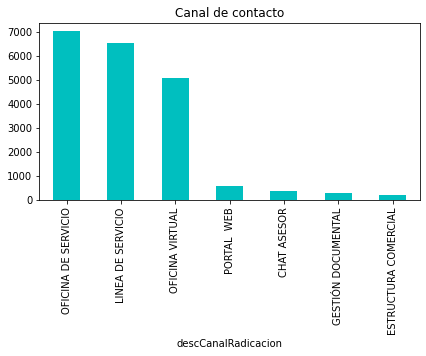

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
df.groupby(df['descCanalRadicacion']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'c')
plt.title('Canal de contacto')

# Codificación de las variables

In [ ]:
# Codificación de las variables

from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas
LE = LabelEncoder()
df2 = df[['afi_hash64','descTema','descSexo', 'descSegmentoAfiliado', 'edadAfiliado', 
          'EstadoPO', 'EstadoPV', 'EstadoCES', 'ultimoIBC','IndicadorUsaClave', 'idAfiliadoTieneClave', 'TieneEmail',
          'descCicloVida','descOcupacion', 'descRegional' , 'descCanalRadicacion']]

df2 = df2[df2.descCanalRadicacion.isin(['LINEA DE SERVICIO', 'OFICINA DE SERVICIO', 'OFICINA VIRTUAL'])]

df2['afi_hash64'] = LE.fit_transform(df2['afi_hash64'])
df2["descTema"] = LE.fit_transform(df2['descTema'])
df2["descSexo"] = LE.fit_transform(df2['descSexo'])
df2["descSegmentoAfiliado"] = LE.fit_transform(df2['descSegmentoAfiliado'])
df2["EstadoPO"] = LE.fit_transform(df2['EstadoPO'])
df2["EstadoPV"] = LE.fit_transform(df2['EstadoPV'])
df2["EstadoCES"] = LE.fit_transform(df2['EstadoCES'])
df2["descCanalRadicacion"] = LE.fit_transform(df2['descCanalRadicacion'])
df2["IndicadorUsaClave"] = LE.fit_transform(df2['IndicadorUsaClave'])
df2["idAfiliadoTieneClave"] = LE.fit_transform(df2['idAfiliadoTieneClave'])
df2["descCicloVida"] = LE.fit_transform(df2['descCicloVida'])
df2["TieneEmail"] = LE.fit_transform(df2['TieneEmail'])
df2["descOcupacion"] = LE.fit_transform(df2['descOcupacion'])
df2["descRegional"] = LE.fit_transform(df2['descRegional'])

In [ ]:
# Eliminamos los registros de clientes que de acuerdo con el conocimiento del negocio no nos contactan normalmente

df3 = df2.drop(df.index[ (df['edadAfiliado'] > 90) & (df['edadAfiliado'] < 18)])

### **2. NORMALIZAR VARAIBLES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()
scaler.fit(df3.iloc[:,1:15])
df4= scaler.transform(df3.iloc[:,1:15])
df4 = pd.DataFrame(df4, columns =  ['descTema','descSexo', 'descSegmentoAfiliado', 'edadAfiliado', 
          'EstadoPO', 'EstadoPV', 'EstadoCES', 'ultimoIBC','IndicadorUsaClave', 'idAfiliadoTieneClave', 'TieneEmail',
          'descCicloVida','descOcupacion', 'descRegional' ])


In [ ]:
#Correlación entre las varibales predictora y con la variable objetivo:

df3.corr()

,afi_hash64,descTema,descSexo,descSegmentoAfiliado,edadAfiliado,EstadoPO,EstadoPV,EstadoCES,ultimoIBC,IndicadorUsaClave,idAfiliadoTieneClave,TieneEmail,descCicloVida,descOcupacion,descRegional,descCanalRadicacion
afi_hash64,1.000000,0.000921,0.006476,0.015998,-0.017859,-0.019553,-0.003990,-0.019335,-0.009754,-0.004510,-0.008732,-0.006302,-0.024888,-0.006396,0.009739,-0.004556
descTema,0.000921,1.000000,-0.006655,0.128358,-0.225750,-0.005191,-0.143367,-0.226772,0.118572,0.047361,0.065005,0.031237,0.047206,-0.028479,-0.066557,-0.114974
descSexo,0.006476,-0.006655,1.000000,-0.034681,0.066464,0.035745,0.012288,-0.000232,0.030905,-0.012108,-0.046826,-0.070833,-0.150841,-0.007880,0.064962,0.035853
descSegmentoAfiliado,0.015998,0.128358,-0.034681,1.000000,-0.323231,-0.509619,-0.123304,-0.407262,-0.022295,0.028931,0.055793,0.157426,0.154728,-0.026005,0.004982,-0.185538
edadAfiliado,-0.017859,-0.225750,0.066464,-0.323231,1.000000,0.382030,-0.075436,0.278545,0.036928,0.025242,0.063862,-0.029037,-0.332019,-0.013828,0.058635,0.249249
EstadoPO,-0.019553,-0.005191,0.035745,-0.509619,0.382030,1.000000,-0.139584,0.115706,0.081193,0.047974,0.086317,-0.030398,-0.211401,-0.050651,-0.021653,0.221725
EstadoPV,-0.003990,-0.143367,0.012288,-0.123304,-0.075436,-0.139584,1.000000,0.019011,-0.307496,-0.140597,-0.203327,-0.099428,0.068771,0.115563,0.073972,-0.070290
EstadoCES,-0.019335,-0.226772,-0.000232,-0.407262,0.278545,0.115706,0.019011,1.000000,-0.067708,-0.090868,-0.161055,-0.092382,-0.121150,0.069684,0.073197,0.100319
ultimoIBC,-0.009754,0.118572,0.030905,-0.022295,0.036928,0.081193,-0.307496,-0.067708,1.000000,0.152508,0.178588,0.063557,-0.018613,-0.072418,-0.032638,0.014594
IndicadorUsaClave,-0.004510,0.047361,-0.012108,0.028931,0.025242,0.047974,-0.140597,-0.090868,0.152508,1.000000,0.568699,0.121433,0.006724,-0.106244,-0.085384,0.022481


Nos interesan las correlaciones entre varibales predictoras inferiores a 0.7 ya que una correlación mayor puede indicar que las varibales no estan proporcionando información adicional al modelo, en este caso las variables son completamente independientes por lo tanto las conservamos todas.

Entre las variables predictoras se puede notar que la mayor correlación esta entre estado de Cesantias con el segmento y con la edad del afiliado y el estado en PO que también influye en el segmento del afiliado.

# **3. Implementación de modelo**
Durante este ciclo de experimientación de toma el mejor modelo obtenido anteriormente y se aplica una selección de características

# **3.1 Separación de datos de entrenamiento y validación**

In [ ]:
#Separacion en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df4,df3["descCanalRadicacion"], 
                                                    test_size=0.2, random_state=10, stratify =df3["descCanalRadicacion"] )

# Mejor modelo inicial
Recordemos que el mejor modelo hasta el momento es el KNN con K = 50 y Weight = distance, con este modelo se puede implementar  el SequentialFeatureSelector de la librería mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
#Instancia del modelo
knn = KNeighborsClassifier(n_neighbors=50, weights='distance')

In [ ]:
# Estructura del modelo se knn con selección de caraterísticas
sfs1 = SFS(knn, 
           k_features=11, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring= make_scorer(f1_score, average = 'weighted'),
           cv=5)

In [ ]:
#Entrenamiento del modelo
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   12.9s finished
Features: 1/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    6.4s finished
Features: 2/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.6s finished
Features: 3/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    7.0s finished
Features: 4/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.7s finished
Features: 5/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.2s finished
Features: 6/11[Parallel(

In [ ]:
# Es necesario que a los datos de entrenamiento y validación se aplique la mejor selección de variables hallada
X_train_sfs = sfs1.transform(X_train)
X_test_sfs = sfs1.transform(X_test)

In [ ]:
# Nueva instancia del modelo knn con la mejor selección de características
clfKnn_sfs = knn.fit(X_train_sfs, y_train)


In [ ]:
score_clfknn_sfs = [f1_score(y_test,clfKnn_sfs.predict(X_test_sfs).astype('int64'), average='weighted'), 
                recall_score(y_test, clfKnn_sfs.predict(X_test_sfs).astype('int64'), average='weighted'), 
               precision_score(y_test, clfKnn_sfs.predict(X_test_sfs).astype('int64'), average='weighted')]

In [ ]:
print('Las métricas F1, Recalla y precision para cada uno de los modeles es: \nKNN_sfs: {}'.format(
score_clfknn_sfs))

Las métricas F1, Recalla y precision para cada uno de los modeles es: 
KNN_sfs: [0.6984959872995946, 0.6987368986831497, 0.701843034733105]


Con el nuevo proceso aplicado, el score del modelo sube un poco más con respecto a la última iteración, y se postula como nuevo mejor modelo para la solución del problema.

Las características más relevantes según el modelo son las siguientes:

In [ ]:
sfs1.k_feature_names_

('descSexo',
 'descSegmentoAfiliado',
 'edadAfiliado',
 'EstadoPO',
 'EstadoPV',
 'EstadoCES',
 'ultimoIBC',
 'IndicadorUsaClave',
 'TieneEmail',
 'descOcupacion',
 'descRegional')

Mejores parámetros para la selección de características:
Tanto los parámetros del modelo KNN, como los de la selección de características aplicada se podrían hallar a través de un grid search, sin embargo, teniendo en cuenta que ambos modelos tienen un alto costo computacional no se presenta en este trabajo, a continuación se muestran unas pruebas con diferentes configuraciones ingresadas manualmente.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=50, weights = 'distance')

In [ ]:
sfs1 = SFS(knn, 
           k_features=12, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring= make_scorer(f1_score, average = 'weighted'),
           cv=5)

In [ ]:
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   12.9s finished

[2021-05-05 00:34:32] Features: 1/12 -- score: 0.5389903972841654[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    6.4s finished

[2021-05-05 00:34:39] Features: 2/12 -- score: 0.6150681313474265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.6s finished

[2021-05-05 00:34:45] Features: 3/12 -- score: 0.6440682005360718[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
X_train_sfs = sfs1.transform(X_train)
X_test_sfs = sfs1.transform(X_test)

In [ ]:
clfKnn_sfs = knn.fit(X_train_sfs, y_train)

In [ ]:
score_clfknn_sfs = [f1_score(y_test,clfKnn_sfs.predict(X_test_sfs).astype('int64'), average='weighted'), 
                recall_score(y_test, clfKnn_sfs.predict(X_test_sfs).astype('int64'), average='weighted'), 
               precision_score(y_test, clfKnn_sfs.predict(X_test_sfs).astype('int64'), average='weighted')]

print('Las métricas F1, Recalla y precision para cada uno de los modeles es: \nKNN_sfs: {}'.format(
score_clfknn_sfs))

Las métricas F1, Recalla y precision para cada uno de los modeles es: 
KNN_sfs: [0.693224230975681, 0.6933619994625101, 0.697298718217116]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
categorical_columns = ['descTema','descSexo',
                    'EstadoPO', 'EstadoPV',  
                    'IndicadorUsaClave', 
                    'TieneEmail','descRegional','descOcupacion']
numerical_columns = ['edadAfiliado', 'ultimoIBC']

X = df2[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    df3["descCanalRadicacion"], 
                                                    test_size=0.2, random_state=10,
                                                    stratify =df3["descCanalRadicacion"] )


categorical_encoder = OneHotEncoder(handle_unknown='ignore')
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_encoder, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

knn_5 = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', KNeighborsClassifier(n_neighbors=50, weights = 'distance'))
])
knn_5.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['descTema', 'descSexo',
                                                   'EstadoPO', 'EstadoPV',
                                                   'IndicadorUsaClave',
                                                   'TieneEmail', 'descRegional',
                                                   'descOcupacion']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['edadAfiliado',
                                                   'ultimoIBC'])])),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=50, weight

In [ ]:
score_knn_5 = [f1_score(y_test,knn_5.predict(X_test).astype('int64'), average='weighted'), 
                recall_score(y_test, knn_5.predict(X_test).astype('int64'), average='weighted'), 
               precision_score(y_test, knn_5.predict(X_test).astype('int64'), average='weighted')]

print('Las métricas F1, Recalla y precision para cada uno de los modeles es: \nKNN_OHE: {}'.format(
score_knn_5))

Las métricas F1, Recalla y precision para cada uno de los modeles es: 
KNN_OHE: [0.6609255974581498, 0.6608438591776404, 0.6612121781523247]


# **Mejor modelo**
Luego del nuevo clico de iteraciones, se postula como mejor modelo el KNN con 50 vecinos, weigh = distance y una selección de las 11 características más relevantes.